In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

In [206]:
df1 = pd.read_csv("C:/workspace/data/seoul_PM/seoul_PM_08-11.csv", encoding="CP949")
df2 = pd.read_csv("C:/workspace/data/seoul_PM/seoul_PM_12-15.csv", encoding="CP949")
df3 = pd.read_csv("C:/workspace/data/seoul_PM/seoul_PM_16-19.csv", encoding="CP949")
df4 = pd.read_csv("C:/workspace/data/seoul_PM/seoul_PM_20-21.csv", encoding="CP949")
df5 = pd.read_csv("C:/workspace/data/seoul_PM/seoul_PM_22.csv", encoding="CP949")

In [207]:
df1

,일시,구분,미세먼지(PM10),초미세먼지(PM25)
0,2011-12-31 23:00,평균,89.0,61.0
1,2011-12-31 23:00,강남구,91.0,58.0
2,2011-12-31 23:00,강동구,89.0,59.0
3,2011-12-31 23:00,강북구,68.0,49.0
4,2011-12-31 23:00,강서구,79.0,69.0
...,...,...,...,...
902525,2008-01-01 1:00,용산구,75.0,18.0
902526,2008-01-01 1:00,은평구,67.0,19.0
902527,2008-01-01 1:00,종로구,56.0,11.0
902528,2008-01-01 1:00,중구,58.0,11.0


In [208]:
df1.tail(25)

,일시,구분,미세먼지(PM10),초미세먼지(PM25)
902505,2008-01-01 1:00,평균,59.0,14.0
902506,2008-01-01 1:00,강동구,61.0,11.0
902507,2008-01-01 1:00,강북구,58.0,14.0
902508,2008-01-01 1:00,강서구,61.0,15.0
902509,2008-01-01 1:00,관악구,55.0,9.0
902510,2008-01-01 1:00,광진구,NaN,24.0
902511,2008-01-01 1:00,구로구,62.0,13.0
902512,2008-01-01 1:00,금천구,48.0,11.0
902513,2008-01-01 1:00,노원구,37.0,18.0
902514,2008-01-01 1:00,도봉구,62.0,20.0


In [209]:
df5.rename(columns={'초미세먼지(PM2.5)':'초미세먼지(PM25)'}, inplace=True)

In [210]:
df = pd.concat([df1, df2, df3, df4, df5])

In [211]:
df.rename(columns={'초미세먼지(PM25)':'초미세먼지(PM2.5)'}, inplace=True)

In [212]:
df

,일시,구분,미세먼지(PM10),초미세먼지(PM2.5)
0,2011-12-31 23:00,평균,89.0,61.0
1,2011-12-31 23:00,강남구,91.0,58.0
2,2011-12-31 23:00,강동구,89.0,59.0
3,2011-12-31 23:00,강북구,68.0,49.0
4,2011-12-31 23:00,강서구,79.0,69.0
...,...,...,...,...
227755,2022-01-01 0:00,용산구,22.0,11.0
227756,2022-01-01 0:00,은평구,19.0,9.0
227757,2022-01-01 0:00,종로구,20.0,9.0
227758,2022-01-01 0:00,중구,20.0,11.0


In [213]:
# 한글 처리를 위해 폰트 설정
font_name = font_manager.FontProperties(fname = "C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family = font_name)

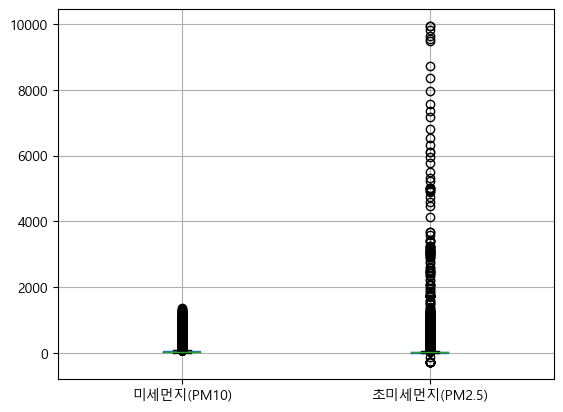

In [214]:
df.boxplot()
plt.show()

In [215]:
df.describe()

,미세먼지(PM10),초미세먼지(PM2.5)
count,3.319914e+06,3.335643e+06
mean,4.406051e+01,2.386598e+01
std,3.489299e+01,3.126510e+01
min,1.000000e+00,-2.730000e+02
25%,2.400000e+01,1.200000e+01
50%,3.700000e+01,2.000000e+01
75%,5.500000e+01,3.100000e+01
max,1.354000e+03,9.940000e+03


In [216]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [217]:
df[((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))] = np.nan

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_2808\3842504480.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df[((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))] = np.nan


In [218]:
df.describe()

,미세먼지(PM10),초미세먼지(PM2.5)
count,3.164825e+06,3.198670e+06
mean,3.907576e+01,2.131781e+01
std,2.128552e+01,1.264761e+01
min,1.000000e+00,-7.000000e+00
25%,2.300000e+01,1.200000e+01
50%,3.600000e+01,1.900000e+01
75%,5.200000e+01,2.900000e+01
max,1.010000e+02,5.900000e+01


In [219]:
df

,일시,구분,미세먼지(PM10),초미세먼지(PM2.5)
0,2011-12-31 23:00,평균,89.0,NaN
1,2011-12-31 23:00,강남구,91.0,58.0
2,2011-12-31 23:00,강동구,89.0,59.0
3,2011-12-31 23:00,강북구,68.0,49.0
4,2011-12-31 23:00,강서구,79.0,NaN
...,...,...,...,...
227755,2022-01-01 0:00,용산구,22.0,11.0
227756,2022-01-01 0:00,은평구,19.0,9.0
227757,2022-01-01 0:00,종로구,20.0,9.0
227758,2022-01-01 0:00,중구,20.0,11.0


In [220]:
df['일시'] = pd.to_datetime(df['일시'])

In [221]:
df

,일시,구분,미세먼지(PM10),초미세먼지(PM2.5)
0,2011-12-31 23:00:00,평균,89.0,NaN
1,2011-12-31 23:00:00,강남구,91.0,58.0
2,2011-12-31 23:00:00,강동구,89.0,59.0
3,2011-12-31 23:00:00,강북구,68.0,49.0
4,2011-12-31 23:00:00,강서구,79.0,NaN
...,...,...,...,...
227755,2022-01-01 00:00:00,용산구,22.0,11.0
227756,2022-01-01 00:00:00,은평구,19.0,9.0
227757,2022-01-01 00:00:00,종로구,20.0,9.0
227758,2022-01-01 00:00:00,중구,20.0,11.0


In [222]:
df_seoul = df.groupby('일시').mean()

In [223]:
df_seoul

,미세먼지(PM10),초미세먼지(PM2.5)
일시,,
2008-01-01 01:00:00,58.958333,14.000000
2008-01-01 02:00:00,51.583333,14.280000
2008-01-01 03:00:00,48.750000,14.080000
2008-01-01 04:00:00,45.333333,15.240000
2008-01-01 05:00:00,41.166667,15.400000
...,...,...
2022-12-31 19:00:00,54.576923,42.000000
2022-12-31 20:00:00,56.269231,42.769231
2022-12-31 21:00:00,56.038462,42.375000


In [224]:
# df_seoul.to_csv("C:/workspace/data/seoul_PM/seoul_PM.csv", encoding="utf-8")

In [225]:
df_seoul

,미세먼지(PM10),초미세먼지(PM2.5)
일시,,
2008-01-01 01:00:00,58.958333,14.000000
2008-01-01 02:00:00,51.583333,14.280000
2008-01-01 03:00:00,48.750000,14.080000
2008-01-01 04:00:00,45.333333,15.240000
2008-01-01 05:00:00,41.166667,15.400000
...,...,...
2022-12-31 19:00:00,54.576923,42.000000
2022-12-31 20:00:00,56.269231,42.769231
2022-12-31 21:00:00,56.038462,42.375000


In [226]:
df_seoul.reset_index(inplace=True)

In [227]:
df_seoul['날짜'] = df_seoul['일시'].dt.date

In [228]:
df_seoul

,일시,미세먼지(PM10),초미세먼지(PM2.5),날짜
0,2008-01-01 01:00:00,58.958333,14.000000,2008-01-01
1,2008-01-01 02:00:00,51.583333,14.280000,2008-01-01
2,2008-01-01 03:00:00,48.750000,14.080000,2008-01-01
3,2008-01-01 04:00:00,45.333333,15.240000,2008-01-01
4,2008-01-01 05:00:00,41.166667,15.400000,2008-01-01
...,...,...,...,...
131488,2022-12-31 19:00:00,54.576923,42.000000,2022-12-31
131489,2022-12-31 20:00:00,56.269231,42.769231,2022-12-31
131490,2022-12-31 21:00:00,56.038462,42.375000,2022-12-31
131491,2022-12-31 22:00:00,57.615385,41.863636,2022-12-31


In [229]:
df_daily = df_seoul.groupby('날짜').mean()

In [230]:
df_daily

,미세먼지(PM10),초미세먼지(PM2.5)
날짜,,
2008-01-01,36.834558,13.160000
2008-01-02,35.655399,16.006667
2008-01-03,53.705927,25.015480
2008-01-04,78.231280,37.075943
2008-01-05,64.480598,28.653605
...,...,...
2022-12-27,49.191594,36.051107
2022-12-28,34.570833,21.232756
2022-12-29,30.307906,18.484193


In [232]:
df_daily['next_PM10'] = np.nan
df_daily['next_PM2.5'] = np.nan
for i in range(df_daily.shape[0]-1):
    df_daily['next_PM10'][i] = df_daily['미세먼지(PM10)'][i+1]
    df_daily['next_PM2.5'][i] = df_daily['초미세먼지(PM2.5)'][i+1]

In [233]:
df_daily

,미세먼지(PM10),초미세먼지(PM2.5),next_PM10,next_PM2.5
날짜,,,,
2008-01-01,36.834558,13.160000,35.655399,16.006667
2008-01-02,35.655399,16.006667,53.705927,25.015480
2008-01-03,53.705927,25.015480,78.231280,37.075943
2008-01-04,78.231280,37.075943,64.480598,28.653605
2008-01-05,64.480598,28.653605,78.442576,40.808084
...,...,...,...,...
2022-12-27,49.191594,36.051107,34.570833,21.232756
2022-12-28,34.570833,21.232756,30.307906,18.484193
2022-12-29,30.307906,18.484193,38.443462,27.576923


In [234]:
df_daily['next_mask_need'] = np.nan
for i in range(df_daily.shape[0]):
    df_daily['next_mask_need'][i] = (1 if (df_daily['next_PM10'][i] >= 80 or df_daily['next_PM2.5'][i] >= 35) else 0)

In [235]:
df_daily

,미세먼지(PM10),초미세먼지(PM2.5),next_PM10,next_PM2.5,next_mask_need
날짜,,,,,
2008-01-01,36.834558,13.160000,35.655399,16.006667,0.0
2008-01-02,35.655399,16.006667,53.705927,25.015480,0.0
2008-01-03,53.705927,25.015480,78.231280,37.075943,1.0
2008-01-04,78.231280,37.075943,64.480598,28.653605,0.0
2008-01-05,64.480598,28.653605,78.442576,40.808084,1.0
...,...,...,...,...,...
2022-12-27,49.191594,36.051107,34.570833,21.232756,0.0
2022-12-28,34.570833,21.232756,30.307906,18.484193,0.0
2022-12-29,30.307906,18.484193,38.443462,27.576923,0.0


In [236]:
df_daily['next_mask_need'].value_counts()

0.0    4669
1.0     810
Name: next_mask_need, dtype: int64

In [237]:
df_daily.dropna(inplace=True)

In [238]:
df_daily

,미세먼지(PM10),초미세먼지(PM2.5),next_PM10,next_PM2.5,next_mask_need
날짜,,,,,
2008-01-01,36.834558,13.160000,35.655399,16.006667,0.0
2008-01-02,35.655399,16.006667,53.705927,25.015480,0.0
2008-01-03,53.705927,25.015480,78.231280,37.075943,1.0
2008-01-04,78.231280,37.075943,64.480598,28.653605,0.0
2008-01-05,64.480598,28.653605,78.442576,40.808084,1.0
...,...,...,...,...,...
2022-12-26,46.834038,34.917054,49.191594,36.051107,1.0
2022-12-27,49.191594,36.051107,34.570833,21.232756,0.0
2022-12-28,34.570833,21.232756,30.307906,18.484193,0.0


In [240]:
df_daily.to_csv("C:/workspace/data/seoul_PM/seoul_PM_daily.csv", encoding="utf-8")